In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
df = pd.read_csv('src/datasets/taxaJuros.csv', sep=';', decimal='.')
df['InicioPeriodo'] = pd.to_datetime(df['InicioPeriodo'], errors='coerce') #transformando a coluna "InicioPeriodo" em datatime

In [2]:
df

,InicioPeriodo,FimPeriodo,codigoSegmento,Segmento,codigoModalidade,Modalidade,Posicao,InstituicaoFinanceira,TaxaJurosAoMes,TaxaJurosAoAno,cnpj8
0,2025-05-19,2025-05-23,2,Pessoa Jurídica,502205,Adiantamento sobre contratos de câmbio (ACC) -...,1,BCO MIZUHO S.A.,0.36,4.38,61088183
1,2025-05-19,2025-05-23,2,Pessoa Jurídica,502205,Adiantamento sobre contratos de câmbio (ACC) -...,2,BCO SOCIETE GENERALE BRASIL,0.38,4.70,61533584
2,2025-05-19,2025-05-23,2,Pessoa Jurídica,502205,Adiantamento sobre contratos de câmbio (ACC) -...,3,BCO KDB BRASIL S.A.,0.39,4.76,7656500
3,2025-05-19,2025-05-23,2,Pessoa Jurídica,502205,Adiantamento sobre contratos de câmbio (ACC) -...,4,BCO DO BRASIL S.A.,0.42,5.14,0
4,2025-05-19,2025-05-23,2,Pessoa Jurídica,502205,Adiantamento sobre contratos de câmbio (ACC) -...,5,BBVA BRASIL BI S.A.,0.42,5.19,45283173
...,...,...,...,...,...,...,...,...,...,...,...
675494,2022-01-01,2022-01-31,1,Pessoa Física,905201,Financiamento imobiliário com taxas reguladas ...,10,BCO DO BRASIL S.A.,0.68,8.52,0
675495,2022-01-01,2022-01-31,1,Pessoa Física,905201,Financiamento imobiliário com taxas reguladas ...,11,BANCO INTER,0.70,8.70,416968
675496,2022-01-01,2022-01-31,1,Pessoa Física,905201,Financiamento imobiliário com taxas reguladas ...,12,BCO BRADESCO S.A.,0.71,8.87,60746948
675497,2022-01-01,2022-01-31,1,Pessoa Física,905201,Financiamento imobiliário com taxas reguladas ...,13,ITAÚ UNIBANCO S.A.,0.72,9.05,60701190


In [3]:
print(f"Total de registros: {len(df):,}")
print(f"Período da base: {df['InicioPeriodo'].min().date()} até {df['InicioPeriodo'].max().date()}")


Total de registros: 675,499
Período da base: 2022-01-01 até 2025-05-19


---
## Bancos com maiores médias de juros


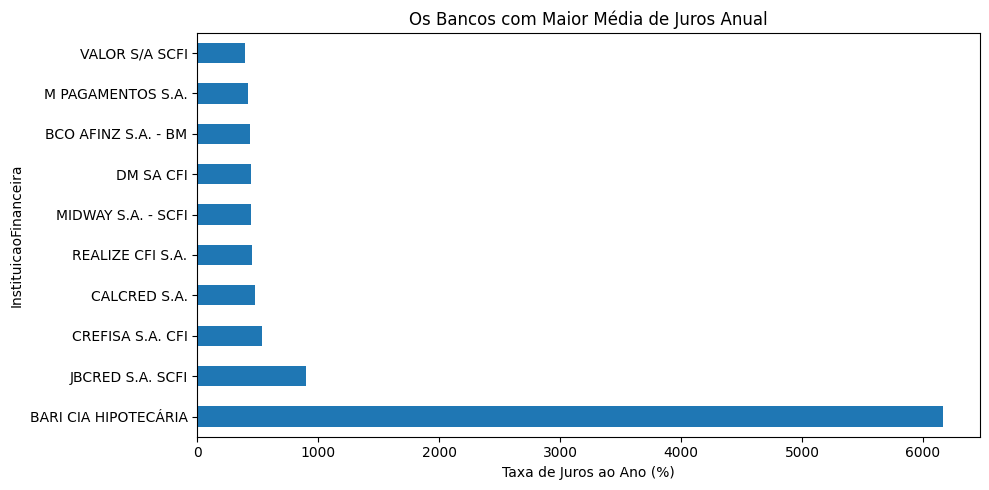

In [9]:
# Agrupa os dados por instituição financeira e calcula a média da taxa de juros ao ano
top_bancos = df.groupby('InstituicaoFinanceira')['TaxaJurosAoAno'] \
    .mean().sort_values(ascending=False).head(10)

# Gera um gráfico de barras horizontais com os 10 bancos que mais cobram juros
top_bancos.plot(kind='barh', figsize=(10, 5),
                title='Os Bancos com Maior Média de Juros Anual')
plt.xlabel('Taxa de Juros ao Ano (%)')
plt.tight_layout()
plt.show()


---
## Modalidades com juros mais altos e instáveis

In [10]:
# Agrupa por modalidade de crédito e calcula média, desvio padrão e quantidade de registros
df_grouped = (
    df.groupby('Modalidade')['TaxaJurosAoAno']
    .agg(Media="mean", DesvioPadrao="std", Quantidade="count")
    .sort_values(by='Media', ascending=False)
    .head(10)
)

# Apresenta a tabela formatada com estilo visual
df_grouped.style.set_caption("Modalidades com maiores taxas médias de juros") \
    .format({"Media": "{:.2f}", "DesvioPadrao": "{:.2f}"}) \
    .background_gradient(cmap='Reds')


,Media,DesvioPadrao,Quantidade
Modalidade,,,
Financiamento imobiliário com taxas de mercado - Pós-fixado referenciado em IPCA,716.90,8961.76,235
Cartão de crédito - rotativo total - Pré-fixado,459.12,255.28,50996
Cartão de crédito - parcelado - Pré-fixado,195.92,122.97,50741
Cheque especial - Pré-fixado,170.79,109.53,48890
Crédito pessoal não-consignado - Pré-fixado,148.53,177.66,71388
Conta garantida - Pré-fixado,68.49,71.75,26991
Aquisição de outros bens - Pré-fixado,53.77,40.49,32557
Capital de giro com prazo até 365 dias - Pré-fixado,45.27,46.57,37302
Desconto de cheques - Pré-fixado,39.03,21.68,14194


Evolução da Taxa de Juros ao Longo do Tempo

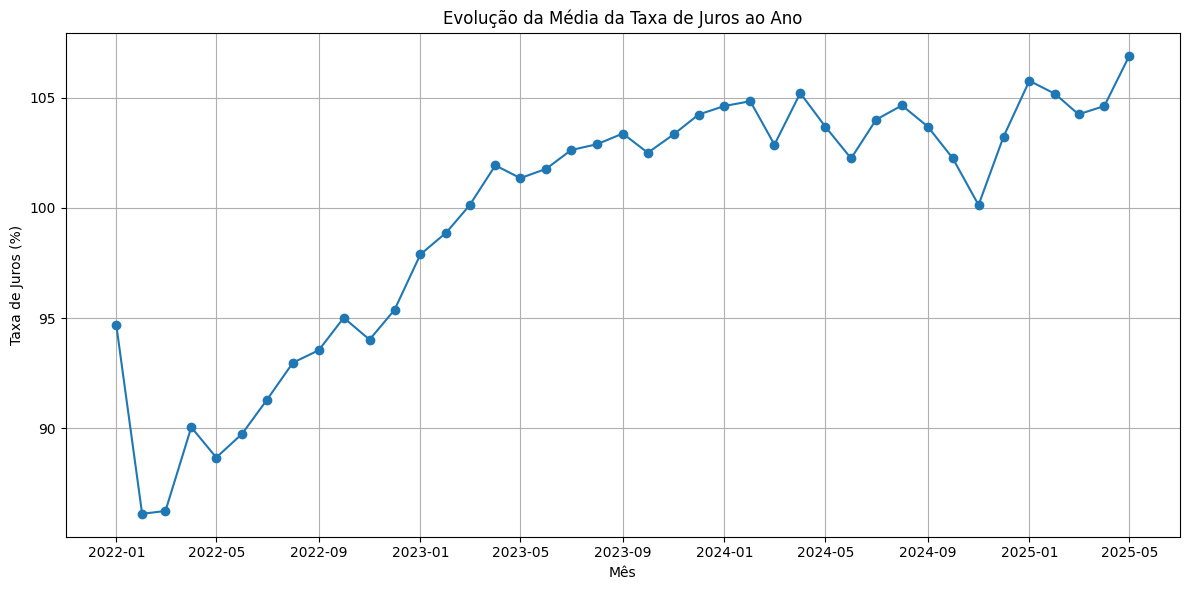

In [11]:
# Cria uma nova coluna 'mes' extraída da data de início do período
df['mes'] = df['InicioPeriodo'].dt.to_period("M")

# Agrupa por mês e calcula a média da taxa de juros ao ano
evolucao = df.groupby('mes')['TaxaJurosAoAno'].mean()
evolucao.index = evolucao.index.to_timestamp()  # converte o índice para datetime

# Gera uma linha temporal mostrando a variação mensal
plt.figure(figsize=(12, 6))
plt.plot(evolucao, marker='o')
plt.title("Evolução da Média da Taxa de Juros ao Ano")
plt.xlabel("Mês")
plt.ylabel("Taxa de Juros (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


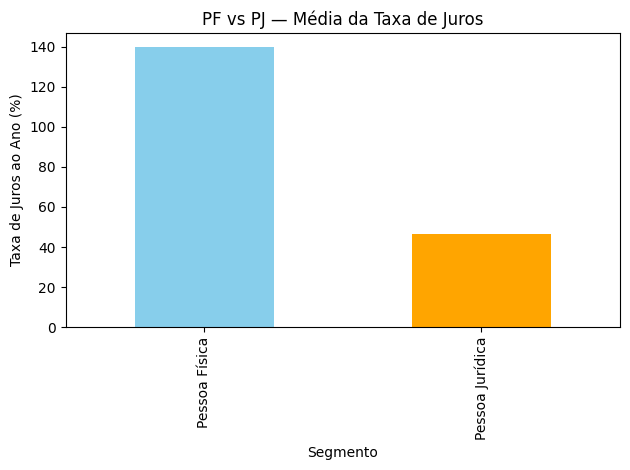

In [12]:
# Agrupa os dados por segmento (ex: Pessoa Física vs Jurídica) e calcula a média da taxa
tipo_pessoa = df.groupby('Segmento')['TaxaJurosAoAno'].mean()

# Gera gráfico de barras comparando as médias por tipo de cliente
tipo_pessoa.plot(kind='bar',
                 color=['skyblue', 'orange'],
                 title="PF vs PJ — Média da Taxa de Juros")
plt.ylabel('Taxa de Juros ao Ano (%)')
plt.tight_layout()
plt.show()
